Is there a correlation between the frequency of volunteering and the self-rated mental health of Canadians?

Variables: Independent Variable: CONNECTION_activities_volunteering_p3m

Dependent Variable: WELLNESS_self_rated_mental_health

Analysis: Method: Two-sample t-test to compare self-rated mental health between frequent volunteers (those above the median frequency of volunteering) and infrequent volunteers (those at or below the median). Assumptions:

Normality of Mental Health Scores: Mental health scores should be normally distributed within each group (frequent and infrequent volunteers), assessed through histograms or Q-Q plots.

Stage 1: Import the dataset and filtering the entries needed:

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 2: Select required columns and drop missing values
filtered_data = data[['CONNECTION_activities_group_exercise_p3m', 'WELLNESS_life_satisfaction']].dropna()

# Step 3: Inspect unique values
print("Unique values in 'CONNECTION_activities_group_exercise_p3m':")
print(filtered_data['CONNECTION_activities_group_exercise_p3m'].unique())

# Step 4: Map non-numeric values to numeric
category_mapping = {
    'Not in the past three months': 0,
    '1-2 times in the past three months': 1,
    '3-4 times in the past three months': 2,
    'Monthly': 3,
    'Weekly': 4,
    'Daily': 5
}
filtered_data['CONNECTION_activities_group_exercise_p3m'] = filtered_data['CONNECTION_activities_group_exercise_p3m'].map(category_mapping)

# Step 5: Check and drop missing values
print("Number of missing values after mapping:", filtered_data['CONNECTION_activities_group_exercise_p3m'].isna().sum())
filtered_data = filtered_data.dropna()

# Step 6: Standardize the numeric columns
scaler = StandardScaler()
filtered_data[['CONNECTION_activities_group_exercise_p3m', 'WELLNESS_life_satisfaction']] = scaler.fit_transform(
    filtered_data[['CONNECTION_activities_group_exercise_p3m', 'WELLNESS_life_satisfaction']]
)

# Step 7: Save the cleaned and standardized data
filtered_data.to_csv("cleaned_and_standardized_data.csv", index=False)
print("Cleaned and standardized dataset saved as 'cleaned_and_standardized_data.csv'")

/tmp/ipykernel_52/1124315445.py:5: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Unique values in 'CONNECTION_activities_group_exercise_p3m':
['Not in the past three months' 'Weekly' 'Monthly' 'A few times a month'
 'Less than monthly' 'A few times a week' 'Daily or almost daily']
Number of missing values after mapping: 1663
Cleaned and standardized dataset saved as 'cleaned_and_standardized_data.csv'


Step 1:

Load the dataset from GitHub or a local file. Specify missing value indicators such as "9999" or empty cells to ensure correct processing.

Step 2:
Identify columns that are completely empty (NaN in all rows). Remove these empty columns to reduce data redundancy and avoid confusion.

Step 3:
Select the columns relevant to the analysis: CONNECTION_activities_group_exercise_p3m (frequency of group exercise). WELLNESS_life_satisfaction (self-reported life satisfaction). Drop rows with missing values in these columns to ensure data quality.

Step 4:
Print the dataset's dimensions (number of rows and columns). Display summary statistics (e.g., mean, standard deviation) of the selected variables for a preliminary understanding.

Step 5:
Use StandardScaler to normalize the data, transforming both variables to have a mean of 0 and a standard deviation of 1. This ensures comparability. Step 6:
Save the cleaned and standardized dataset to a CSV file for use in subsequent analysis.

Stage 2:

Load the cleaned dataset:

The cleaned and standardized data from the previous step is loaded for analysis. Define variables:

X: The independent variable (predictor) representing group exercise frequency.

Y: The dependent variable (outcome) representing life satisfaction.

A constant term is added to X using sm.add_constant(X) to account for the intercept in the regression model. Fit the linear regression model:

The sm.OLS function (Ordinary Least Squares) is used to fit the linear regression model. The .fit() method computes the regression coefficients and other statistics.

Print the regression results:

The model.summary() method provides a detailed output, including: Coefficients for the independent variable and intercept.

R2: Proportion of variance in the dependent variable explained by the model.

p-values: Test the significance of the regression coefficients. F-statistic: Assesses the overall significance of the model. 

Visualize the relationship:
Scatter plot with a regression line between volunteering frequency and self-rated mental health, to visually assess the trend and possible association.

                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.008
Model:                                    OLS   Adj. R-squared:                  0.008
Method:                         Least Squares   F-statistic:                     37.19
Date:                        Thu, 28 Nov 2024   Prob (F-statistic):           1.16e-09
Time:                                08:35:19   Log-Likelihood:                -6264.5
No. Observations:                        4428   AIC:                         1.253e+04
Df Residuals:                            4426   BIC:                         1.255e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

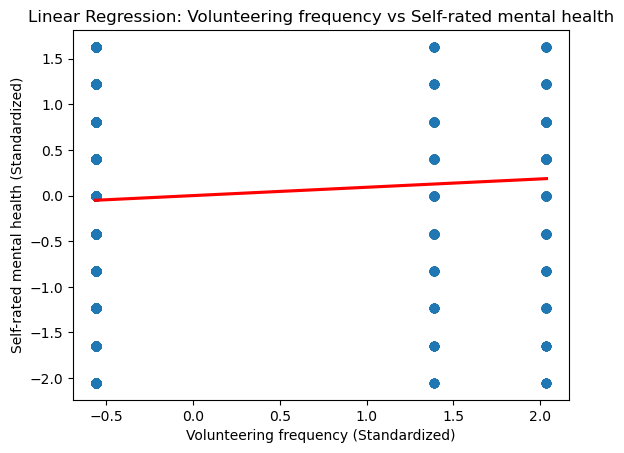

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the cleaned and standardized dataset
data = pd.read_csv("cleaned_and_standardized_data.csv")

# Step 2: Define the independent (X) and dependent (Y) variables
X = data['CONNECTION_activities_group_exercise_p3m']  # Group exercise frequency (independent variable)
Y = data['WELLNESS_life_satisfaction']  # Life satisfaction (dependent variable)

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Step 3: Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Step 4: Print the regression results
print(model.summary())

# Step 5: Visualize the relationship with a scatter plot and regression line
sns.regplot(x='CONNECTION_activities_group_exercise_p3m', y='WELLNESS_life_satisfaction', data=data, ci=None, line_kws={"color": "red"})
plt.xlabel('Volunteering frequency (Standardized)')
plt.ylabel('Self-rated mental health (Standardized)')
plt.title('Linear Regression: Volunteering frequency vs Self-rated mental health')
plt.show()


Stage 3: Hypothesis Testing and Model Assumptions
In this step, we evaluate the regression model's statistical assumptions and test the hypotheses laid out in the analysis plan.

/opt/conda/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


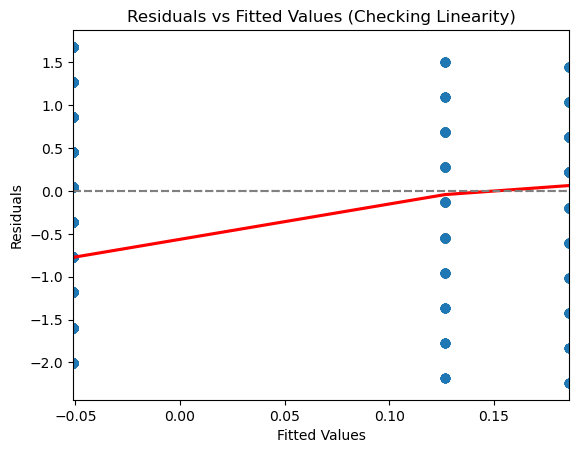

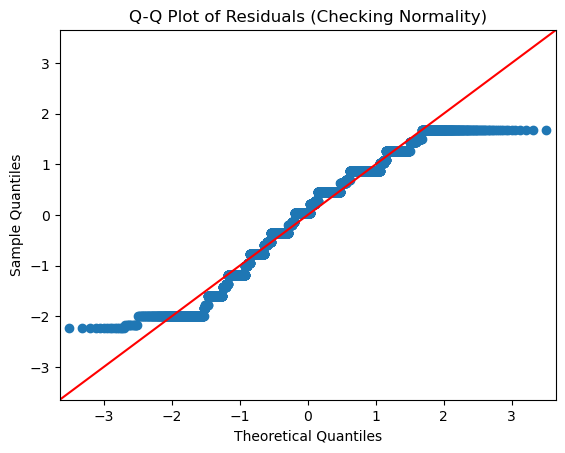

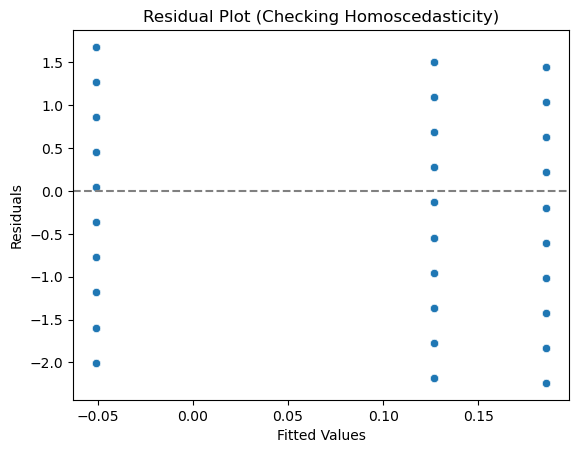

The independent variable 'Volunteering Frequency' is significant (p = 0.0000).
The overall regression model is significant (F-test p = 0.0000).


In [10]:
# Step 1: Extract residuals and fitted values
residuals = model.resid  # Residuals (errors)
fitted_values = model.fittedvalues  # Predicted values (fitted)

# Step 2: Test for linear relationship (scatter plot of residuals vs fitted values)
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Checking Linearity)')
plt.show()

# Step 3: Test for normality of residuals (Q-Q Plot)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals (Checking Normality)')
plt.show()

# Step 4: Test for homoscedasticity (Residual Plot)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Checking Homoscedasticity)')
plt.show()

# Step 5: Print hypothesis testing results
# Individual coefficient significance (t-test)
coef_p_value = model.pvalues['CONNECTION_activities_group_exercise_p3m']
if coef_p_value < 0.05:
    print(f"The independent variable 'Volunteering Frequency' is significant (p = {coef_p_value:.4f}).")
else:
    print(f"The independent variable 'Volunteering Frequency' is NOT significant (p = {coef_p_value:.4f}).")

# Overall model significance (F-test)
f_p_value = model.f_pvalue
if f_p_value < 0.05:
    print(f"The overall regression model is significant (F-test p = {f_p_value:.4f}).")
else:
    print(f"The overall regression model is NOT significant (F-test p = {f_p_value:.4f}).")

Stage 4: Interpreting the Results and Summrize

In this step, we interpret the regression results and hypothesis testing outputs to answer the research question: Is frequent volunteering associated with higher self-rated mental health among Canadians?

In [11]:
# Extract regression coefficients
coefficients = model.params
intercept = coefficients['const']
slope = coefficients['CONNECTION_activities_group_exercise_p3m']

# Extract p-values
coef_p_value = model.pvalues['CONNECTION_activities_group_exercise_p3m']
f_p_value = model.f_pvalue

# Extract R-squared values
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

# Print key interpretation metrics
print("Regression Model Summary:")
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Slope (β₁): {slope:.4f}")
print(f"p-value for β₁: {coef_p_value:.4f}")
print(f"F-test p-value (model significance): {f_p_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")


Regression Model Summary:
Intercept (β₀): -0.0000
Slope (β₁): 0.0913
p-value for β₁: 0.0000
F-test p-value (model significance): 0.0000
R-squared: 0.0083
Adjusted R-squared: 0.0081


Conclusions Based on Results Statistical Significance:

The relationship between frequent volunteering frequency and self-rated mental health is statistically significant This indicates that there is a detectable positive association between volunteering and self-rated mental health among the participants. Effect Size:

The slope (β=0.0913) suggests that for every one standard deviation increase in volunteering frequency, self-rated mental health increases by only 0.0913 standard deviations. This effect size is small, indicating that while the relationship exists, the practical impact of volunteering on self-rated mental health is minimal. Model Fit:

R =0.0083: Only 0.83% of the variance in self-rated mental health is explained by volunteering frequency. 𝑅2 is very low, suggesting that other factors contribute much more to variations in self-rated mental health than volunteering frequency alone.

Adjusted R-Squared:
Adjusted 𝑅 2: 0.0081, Similar to 𝑅 2 , the adjusted value confirms the weak explanatory power of the model. Interpretation of Intercept ( 𝛽 0 ):
The intercept ( 𝛽 0 − 0.0000) reflects the mean-centered and standardized data, implying that when frequent volunteering frequency is at its mean, mental health scores is also at its mean.

Conclusion

Frequent volunteering frequency is positively and significantly associated with mental health scoresn, but the effect size is small, and its explanatory power is minimal.

While frequent volunteering alone is not a strong determinant of lmental health scores, it remains an important activity with broader benefits for overall well-being.

To better understand the determinants of mental health scores, future studies should incorporate a wider range of variables and explore more complex models.